In [1]:
import numpy as np

import torch
from torch import nn

import matplotlib
import matplotlib.pyplot as plt

from IPython import display

In [32]:
vals = np.linspace(0.0, 2.0, 5, dtype=np.single)
input = torch.tensor([[x, 2 - y] for y in vals for x in vals])

expected = torch.tensor([
    0, 1, 1, 1, 1,
    0, 0, 1, 1, 1,
    0, 0, 0, 1, 1,
    0, 0, 0, 0, 1,
    0, 0, 0, 0, 0,
]).reshape(-1, 1).to(torch.float32)

dtype('float32')

In [ ]:
vals = np.linspace(0.0, 2.0, 5)
test = torch.tensor([[x, y] for y in vals for x in vals]).to(torch.float32)

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [29]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train_loop():
    # Compute prediction and loss
    out = model(input)
    loss = loss_fn(out, expected)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss

0.22002290189266205


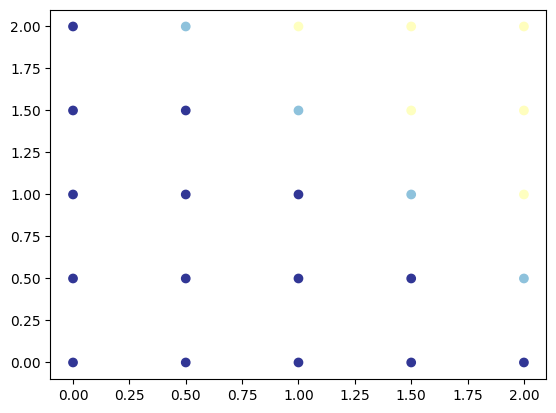

In [30]:
pred = model(input).flatten().detach().numpy()

plt.ion()

fig, ax = plt.subplots()
scat = ax.scatter(input[:, 0], input[:, 1], c=pred, cmap="RdYlBu_r", norm=matplotlib.colors.CenteredNorm(1, halfrange=0.5))
plt.show()

epochs = 40000
for t in range(epochs):
    loss = train_loop()

    if t % (epochs / 10) == 0:

        pred = model(input).flatten().detach().numpy()
        scat.set_array(pred)

        display.clear_output(wait=True)
        print(loss.item())
        display.display(fig)